#### Problem - Tutorial 2: Classification

Given a set of features or attributes of a bank note, can we predict whether it's authentic or fake?
Four attributes contribute to this classification:
1. variance or transformed image
2. skeweness
3. entropy
4. curtosis

<table>
  <tr><td>
    <img src="hhttps://raw.githubusercontent.com/dmatrix/tutorials/master/mlflow/images/bank_note.png"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td>
    <img src="https://databricks.com/wp-content/uploads/2020/04/matrix_morpheus.png"
         alt="Bank Note " width="600">
  </td></tr>
</table>

#### Solution:

We are going to use Random Forest Classification to make the prediction, and measure on the accuracy.
The closer to 1.0 is the accuracy the better is our confidence in its prediction.

This example is borrowed from these source, modified and modularized for this tutorial [source-1](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)
and data [source-2](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

Aim of this Lab:

1. Understand MLflow Tracking API
2. How to use the MLflow Tracking API
3. Use the MLflow API to experiment few Runs
4. Interpret and observer runs via the MLflow UI

Some resources:
* [MLflow Docs](https://mlflow.org/docs/latest/python_api/mlflow.html)
* [All about confufsion matrix](https://devopedia.org/confusion-matrix)
* [More on classification matrix](https://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)
* [How to plot AUC and ROC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

Define all the classes and bring them into scope

In [0]:
%run ./setup/class_setup

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame

Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RandomForestClassifierModel Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared params() returns existing Random Forest Model's init parameters. 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RandomForestModel Base Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RFFExperimentModel Extended Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

In [0]:
# load and print dataset
dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/bill_authentication.csv")
dataset.head(5)

Out[12]:

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Confusion matrix, without normalization
[[154 3]
 [ 5 113]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 61120102f36e4a3d902796a7a920d780 and experiment_id 2387317862617782
Estimators trees: 1
[[154 3]
 [ 5 113]]
 precision recall f1-score support

 0 0.97 0.98 0.97 157
 1 0.97 0.96 0.97 118

 accuracy 0.97 275
 macro avg 0.97 0.97 0.97 275
weighted avg 0.97 0.97 0.97 275

Accuracy Score: 0.9709090909090909
Precision : 0.9741379310344828
ROC : 0.9692594191946454
MLflow Run completed with run_id 61120102f36e4a3d902796a7a920d780 and experiment_id 2387317862617782
----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[155 2]
 [ 3 115]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id f6933cc5757144c79d85f44d597d21e0 and experiment_id 2387317862617782
Estimators trees: 3
[[155 2]
 [ 3 115]]
 precision recall f1-score support

 0 0.98 0.99 0.98 157
 1 0.98 0.97 0.98 118

 accuracy 0.98 275
 macro avg 0.98 0.98 0.98 275
weighted avg 0.98 0.98 0.98 275

Accuracy Score: 0.9818181818181818
Precision : 0.9829059829059829
ROC : 0.980918708841628
MLflow Run completed with run_id f6933cc5757144c79d85f44d597d21e0 and experiment_id 2387317862617782
----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[155 2]
 [ 4 114]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 237798ac66c04197a16cbf5740c03703 and experiment_id 2387317862617782
Estimators trees: 5
[[155 2]
 [ 4 114]]
 precision recall f1-score support

 0 0.97 0.99 0.98 157
 1 0.98 0.97 0.97 118

 accuracy 0.98 275
 macro avg 0.98 0.98 0.98 275
weighted avg 0.98 0.98 0.98 275

Accuracy Score: 0.9781818181818182
Precision : 0.9827586206896551
ROC : 0.9766814207060348
MLflow Run completed with run_id 237798ac66c04197a16cbf5740c03703 and experiment_id 2387317862617782
----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[155 2]
 [ 2 116]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 307dfbd706af40429fb4af7d69711ec4 and experiment_id 2387317862617782
Estimators trees: 7
[[155 2]
 [ 2 116]]
 precision recall f1-score support

 0 0.99 0.99 0.99 157
 1 0.98 0.98 0.98 118

 accuracy 0.99 275
 macro avg 0.99 0.99 0.99 275
weighted avg 0.99 0.99 0.99 275

Accuracy Score: 0.9854545454545455
Precision : 0.9830508474576272
ROC : 0.9851559969772212
MLflow Run completed with run_id 307dfbd706af40429fb4af7d69711ec4 and experiment_id 2387317862617782
----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[155 2]
 [ 2 116]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id b01ae31f0d504672af032e7d449faf98 and experiment_id 2387317862617782
Estimators trees: 9
[[155 2]
 [ 2 116]]
 precision recall f1-score support

 0 0.99 0.99 0.99 157
 1 0.98 0.98 0.98 118

 accuracy 0.99 275
 macro avg 0.99 0.99 0.99 275
weighted avg 0.99 0.99 0.99 275

Accuracy Score: 0.9854545454545455
Precision : 0.9830508474576272
ROC : 0.9851559969772212
MLflow Run completed with run_id b01ae31f0d504672af032e7d449faf98 and experiment_id 2387317862617782
----------------------------------------------------------------------------------------------------

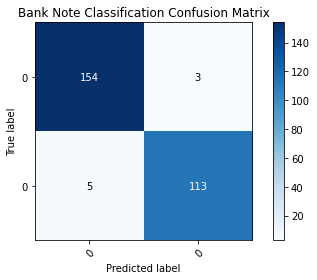

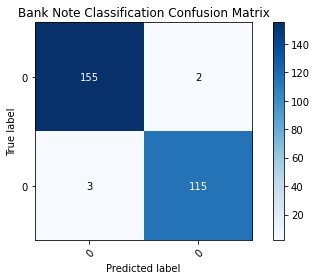

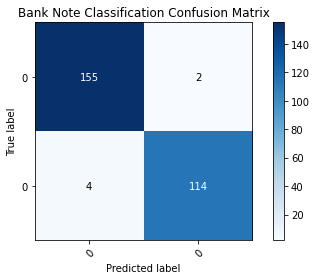

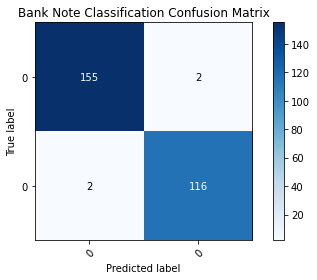

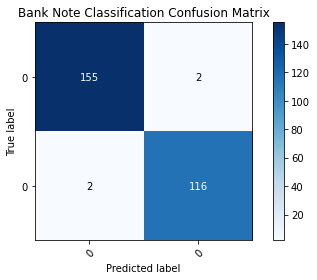

In [0]:
# iterate over several runs with different parameters
# TODO in the Lab (change these parameters, n_estimators and random_state
# with each iteration.
# Does that change the metrics and accuracy?
# start with n=10, step by 10 up to X <=40
for n in range(1, 10, 2):
  params = {"n_estimators": n, "random_state": 42}
  rfr = RFCModel.new_instance(params)
  (experimentID, runID) = rfr.mlflow_run(dataset)
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

#### Lab/Homework for Some Experimental run
1. Consult [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation
  * Change or add parameters, such as depth of the tree or random_state: 42 etc.
2. Change or alter the range of runs and increments of n_estimators
3. Check in MLfow UI if the metrics are affected
4. Try [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) instead of [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and examine if there is a difference in the metrics
5. Is the ROC for Randorm Forest better than LogisticRegression